# Analysis - Part B

In [ ]:
# Allow imports from parent directory - robust incase run twice 
import os, sys
if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")
    sys.path.append(os.path.abspath(".")) 

import numpy as np
import pandas as pd
np.random.seed(10)

# Import base level distributions
from Stats_Analysis import CrystalBall
from Stats_Analysis import ExponentialDecay
from Stats_Analysis import NormalDistribution
from Stats_Analysis import UniformDistribution

# Import signal and background distributions which are combinations of the base level distributions
from Stats_Analysis import Signal
from Stats_Analysis import Background

# Import overall distribution which is a combination of the signal and background distributions
from Stats_Analysis import Signal_Background

## Part B
### Calculating Base Disributions
First each individual compound distribution is defined using arbitary starting parameters to show they are flexible and are normalised for all cases.

### Implementation of truncated limits
Each distribution supports both untruncated and truncated declaration automatically depending on whether limits are given 
- The exception to this is the uniform distribution which requires limits by definition

The truncation of the probability density function (PDF) is calculated using the cumulative distribution function (CDF). 

The truncated PDF, $ f_T(x) $, can be expressed mathematically as:

$$
f_T(x) = \begin{cases} 
\frac{f(x)}{F(b) - F(a)} & \text{if } x \in [a, b] \\
0 & \text{otherwise,}
\end{cases}
$$

where:
- $ f(x) $ is the original distribution's PDF,
- $ F(x) $ is the original distribution's CDF,
- a and b are the lower and upper truncation bounds, respectively.

### Checking Normalisation
This method should ensure that the total probability integrates to 1 within the truncated range:
$$
\int_a^b f_T(x) \, dx = 1.
$$
Also as the pdf is set to 0 outside of these ranges the total probability should also integrate to 1 over the whole real line:
$$
\int_{-\infty}^{\infty} f_T(x) \, dx = 1
$$

This is tested by using the classes `normalisation_check` property which:
- integrates between the limits of the truncation region
- integrates over the whole region
- uses `scipy.integrate.quad` in the case of 1D distributions
- and `scipy.integrate.dblquad` in the case of 2D distributions

## Performing for random variables

### The Crystal Ball Distribution ($g_s(X)$)

[Relavent Code and Documentation Crystal Ball Distribution](https://stat-frequentist-analysis.readthedocs.io/en/latest/Stats_Analysis/Base_Dist/CrystalBall_Class.html#module-Stats_Analysis.Base_Dist.CrystalBall_Class)

#### Generate Random Parameters to trail on



In [2]:
# Pick random parameters for Crystal Ball distribution
cb_lower_trunc = np.random.uniform(-10,-5)
cb_upper_trunc = np.random.uniform(5,10)
cb_mean = np.random.uniform(-5,5)
cb_sigma = np.random.uniform(1,3)
cb_beta = np.random.uniform(0,3)
cb_m = np.random.uniform(1,5)

# Print the random parameters in a table
print("Random Crystal Ball Parameters for testing")

cb_parameters = {
    "Parameter": ["Lower Truncation", "Upper Truncation", "Mean", "Sigma", "Beta", "M"],
    "Value": [cb_lower_trunc, cb_upper_trunc, cb_mean, cb_sigma, cb_beta, cb_m]
}
cb_df = pd.DataFrame(cb_parameters)
print(cb_df.to_markdown(index=False))

Random Crystal Ball Parameters for testing
| Parameter        |    Value |
|:-----------------|---------:|
| Lower Truncation | -6.1434  |
| Upper Truncation |  5.10376 |
| Mean             |  1.33648 |
| Sigma            |  2.49761 |
| Beta             |  1.49552 |
| M                |  1.89919 |


#### Initialise the distribution using `CrystalBall` class
- using random parameters
- plot the distribution for visualisation

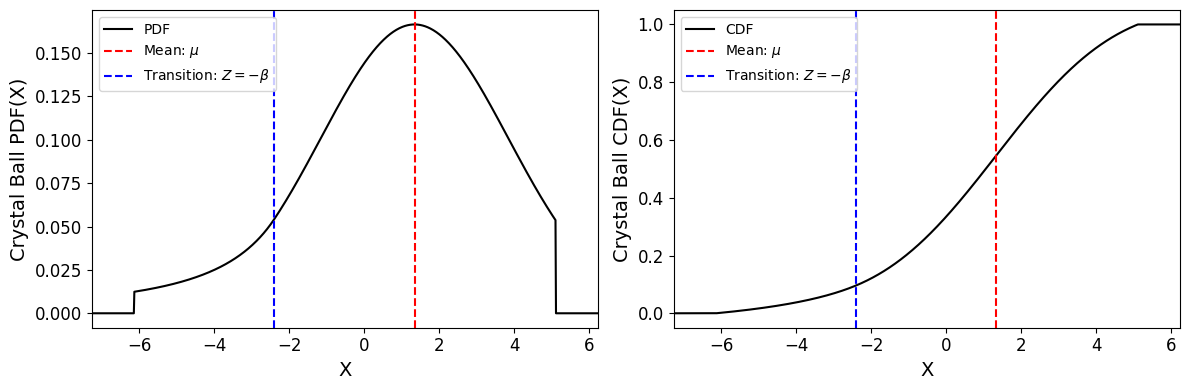

Normalisation over the region the PDF is defined/truncated: [-6.14339678366627,5.1037597467970075]
Integral: 1.0000000000141527 ± 1.9915175756653727e-09
Normalisation over the whole real line: [infinity to infinity]
Integral: 0.999999999510953 ± 3.927037626215639e-08


/Users/jacobtutt/Desktop/MPhil_DIS/S1/Coursework_S1/Stats_Analysis/Base_Dist/CrystalBall_Class.py:255: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral_inf, error_inf = quad(lambda x: self.pdf(x), -np.inf, np.inf)


In [3]:
# Declare the Crystal Ball distribution with random parameters
cb = CrystalBall( cb_mean, cb_sigma, cb_beta, cb_m, cb_lower_trunc, cb_upper_trunc)

# Plot the distribution
cb.plot_dist()

# Check Normalisation - both over truncated range and full range of real numbers
cb.normalisation_check()


#### Check Normalised to 1
- Integrate over 1 dimension

In [4]:
# Check Normalisation - both over truncated range and full range of real numbers
cb.normalisation_check()

Normalisation over the region the PDF is defined/truncated: [-6.14339678366627,5.1037597467970075]
Integral: 1.0000000000141527 ± 1.9915175756653727e-09
Normalisation over the whole real line: [infinity to infinity]
Integral: 0.999999999510953 ± 3.927037626215639e-08


### The Exponential Decay Distribution ($h_s(X)$)

[Relavent Code and Documentation Exponential Decay Distribution](https://stat-frequentist-analysis.readthedocs.io/en/latest/Stats_Analysis/Base_Dist/ExponentialDecay_Class.html)

#### Generate Random Parameters to trail on

In [5]:
# Pick random parameters for Exponetial Decay distribution
ed_lambda = np.random.uniform(0,3)
ed_lower_trunc = np.random.uniform(0,10)
ed_upper_trunc = np.random.uniform(10,20)

# Print the random parameters in a table
print("Random Exponential Decay Distribution Parameters for testing")

ed_parameters = {
    "Parameter": ["Lamda", "Lower Truncation", "Upper Truncation"],
    "Value": [ed_lambda, ed_lower_trunc, ed_upper_trunc]
}
ed_df = pd.DataFrame(ed_parameters)
print(ed_df.to_markdown(index=False))

Random Exponential Decay Distribution Parameters for testing
| Parameter        |     Value |
|:-----------------|----------:|
| Lamda            |  0.594189 |
| Lower Truncation |  7.60531  |
| Upper Truncation | 11.6911   |


#### Initialise the distribution using `ExponentialDecay` Class
- using random parameters
- plot the distribution for visualisation

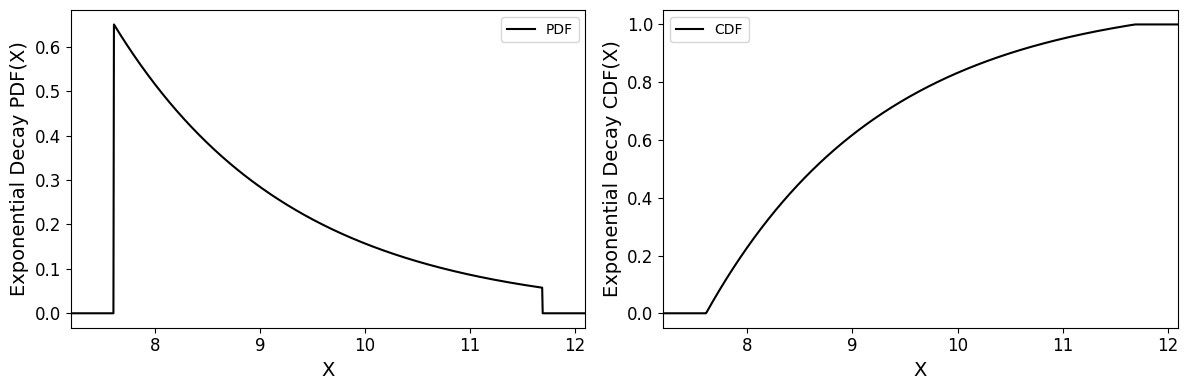

In [6]:
# Declare the Exponential Decay distribution with random parameters
ed = ExponentialDecay(ed_lambda, ed_lower_trunc, ed_upper_trunc)

# Plot the distribution
ed.plot_dist()

#### Check Normalised to 1
- Integrate over 1 Dimension

In [7]:
# Check Normalisation - both over truncated range and full range of real numbers
ed.normalisation_check()

Normalisation over the region the PDF is defined/truncated: [7.605307121989587,11.691108365625354]
Integral: 1.000000000000008 ± 1.1102230246251654e-14
Normalisation over the whole real line: [infinity to infinity]
Integral: 1.000000000000008 ± 1.1102230246251654e-14


### The Uniform Distribution ($g_b(X)$)

[Relavent Code and Documentation for Uniform Distribution](https://stat-frequentist-analysis.readthedocs.io/en/latest/Stats_Analysis/Base_Dist/UniformDistribution_Class.html)

#### Generate Random Parameters to trail on

In [8]:
# Pick random parameters for Uniform distribution
ud_lower_trunc = np.random.uniform(-10,-5)
ud_upper_trunc = np.random.uniform(5,10)

# Print the random parameters in a table
print("Random Uniform Distribution Parameters for testing")

ud_parameters = {
    "Parameter": ["Lower Truncation", "Upper Truncation"],
    "Value": [ud_lower_trunc, ud_upper_trunc]
}
ud_df = pd.DataFrame(ud_parameters)
print(ud_df.to_markdown(index=False))

Random Uniform Distribution Parameters for testing
| Parameter        |   Value |
|:-----------------|--------:|
| Lower Truncation | -9.5583 |
| Upper Truncation |  8.4268 |


#### Initialise the distribution using `UniformDistribution` class
- using random parameters
- plot the distribution for visualisation

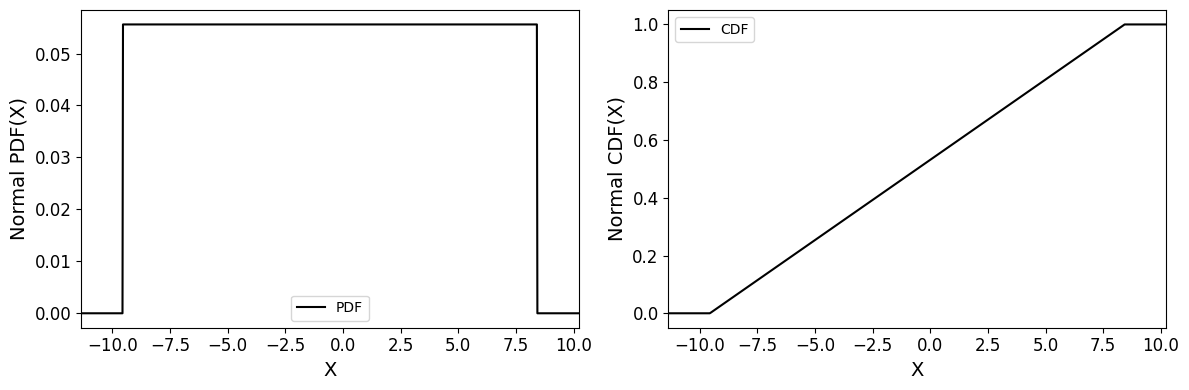

In [9]:
# Declare the Uniform distribution with random parameters
ud = UniformDistribution(ud_lower_trunc, ud_upper_trunc)

# Plot the distribution
ud.plot_dist()

#### Check Normalised to 1
- Integrate over 1 Dimension

In [10]:
#### Generate Random Parameters to trail on

# Check Normalisation - both over truncated range and full range of real numbers
ud.normalisation_check()

Normalisation over the region the PDF is defined/truncated: [-9.558300929129949,8.426799091838987]
Integral: 1.0 ± 1.1102230246251565e-14
Normalisation over the whole real line: [infinity to infinity]
Integral: 1.0000000010870702 ± 1.0079867860656783e-08


### The Normal Distribution ($h_b(X)$)

[Relavent Code and Documentation for Normal Distribution](https://stat-frequentist-analysis.readthedocs.io/en/latest/Stats_Analysis/Base_Dist/NormalDistribution_Class.html)

In [11]:
# Pick random parameters for Normal distribution
nd_mean = np.random.uniform(-5,5)
nd_sigma = np.random.uniform(1,3)
nd_lower_trunc = np.random.uniform(-10,-5)
nd_upper_trunc = np.random.uniform(5,10)

# Print the random parameters in a table
print("Random Normal Distribution Parameters for testing")

nd_parameters = {
    "Parameter": ["Mean", "Sigma", "Lower Truncation", "Upper Truncation"],
    "Value": [nd_mean, nd_sigma, nd_lower_trunc, nd_upper_trunc]
}
nd_df = pd.DataFrame(nd_parameters)
print(nd_df.to_markdown(index=False))

Random Normal Distribution Parameters for testing
| Parameter        |    Value |
|:-----------------|---------:|
| Mean             |  4.53393 |
| Sigma            |  1.0079  |
| Lower Truncation | -7.43904 |
| Upper Truncation |  9.0631  |


#### Initialise the distribution using `NormalDistribution` class
- using random parameters
- plot the distribution for visualisation

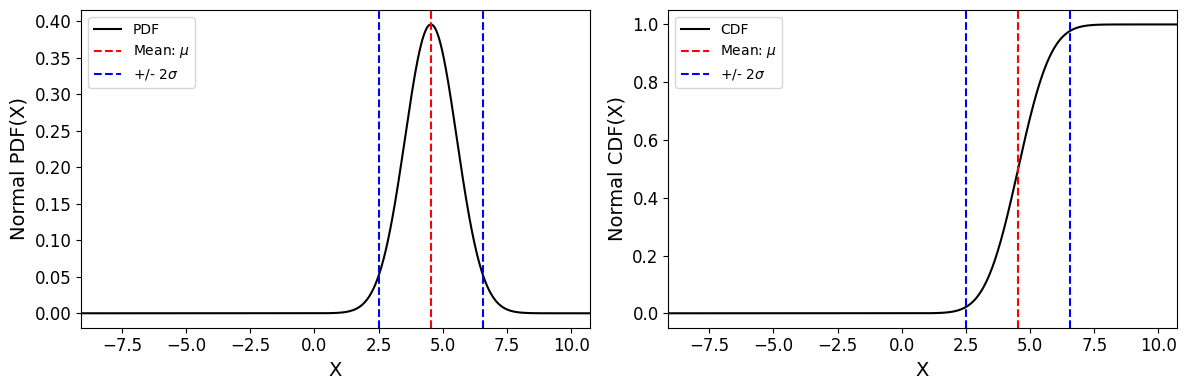

In [12]:
# Declare the Normal distribution with random parameters
nd = NormalDistribution(nd_mean, nd_sigma, nd_lower_trunc, nd_upper_trunc)

# Plot the distribution
nd.plot_dist()

#### Check Normalised to 1
- Integrate over 1 Dimension

In [13]:
# Check Normalisation - both over truncated range and full range of real numbers
nd.normalisation_check()

Normalisation over the region the PDF is defined/truncated: [-7.439038683071117,9.063104808260567]
Integral: 0.9999999999999999 ± 3.9745585512292615e-09
Normalisation over the whole real line: [infinity to infinity]
Integral: 0.9999999999304456 ± 6.286178361982054e-09


### The Signal Distribution, 2D ($S(X, Y)$)

[Relavent Code and Documentation for Signal Distribution](https://stat-frequentist-analysis.readthedocs.io/en/latest/Stats_Analysis/Compound_Dist/Signal_Class.html)

Given by:
$$
S(X, Y) = g_s(X) h_s(Y)
$$

Where:
- $g_s(X)$ is the Crystal Ball Distribution in the X Dimension
- $h_s(Y)$ is the Exponential Decay Distribution in the Y Dimension

#### Generate Random Parameters to trail on


In [14]:
# Pick random parameters for 2D Signal distribution
# Random parameters for Crystal Ball distribution
s_cb_mean = np.random.uniform(-5,5)
s_cb_sigma = np.random.uniform(1,3)
s_cb_beta = np.random.uniform(0,3)
s_cb_m = np.random.uniform(1,5)

# Random parameters for Exponential Decay distribution
s_ed_lambda = np.random.uniform(0,1)

# Truanction parameters
s_x_lower_trunc = np.random.uniform(-10,-5)
s_x_upper_trunc = np.random.uniform(5,10)
s_y_lower_trunc = np.random.uniform(0,5)
s_y_upper_trunc = np.random.uniform(5,10)

# Print the random parameters in a table
print("Random Signal Distribution Parameters for testing")

s_parameters = {
    "Distribution": ["Crystal Ball", "Crystal Ball", "Crystal Ball", "Crystal Ball", "Exponential Decay", "Truncation",  "Truncation",  "Truncation",  "Truncation"],
    "Parameter": ["Mean", "Sigma", "Beta", "M", "Lambda", "X Lower", "X Upper", "Y Lower", "Y Upper"],
    "Value": [s_cb_mean, s_cb_sigma, s_cb_beta, s_cb_m, s_ed_lambda, s_x_lower_trunc, s_x_upper_trunc, s_y_lower_trunc, s_y_upper_trunc]
}
s_df = pd.DataFrame(s_parameters)
print(s_df.to_markdown(index=False))

Random Signal Distribution Parameters for testing
| Distribution      | Parameter   |     Value |
|:------------------|:------------|----------:|
| Crystal Ball      | Mean        |  1.12526  |
| Crystal Ball      | Sigma       |  2.44351  |
| Crystal Ball      | Beta        |  0.875628 |
| Crystal Ball      | M           |  4.6711   |
| Exponential Decay | Lambda      |  0.714576 |
| Truncation        | X Lower     | -7.28728  |
| Truncation        | X Upper     |  5.71085  |
| Truncation        | Y Lower     |  1.8667   |
| Truncation        | Y Upper     |  8.37067  |


#### Initialise the 2D distribution using `Signal` class
- using random parameters
- plot the distribution for visualisation

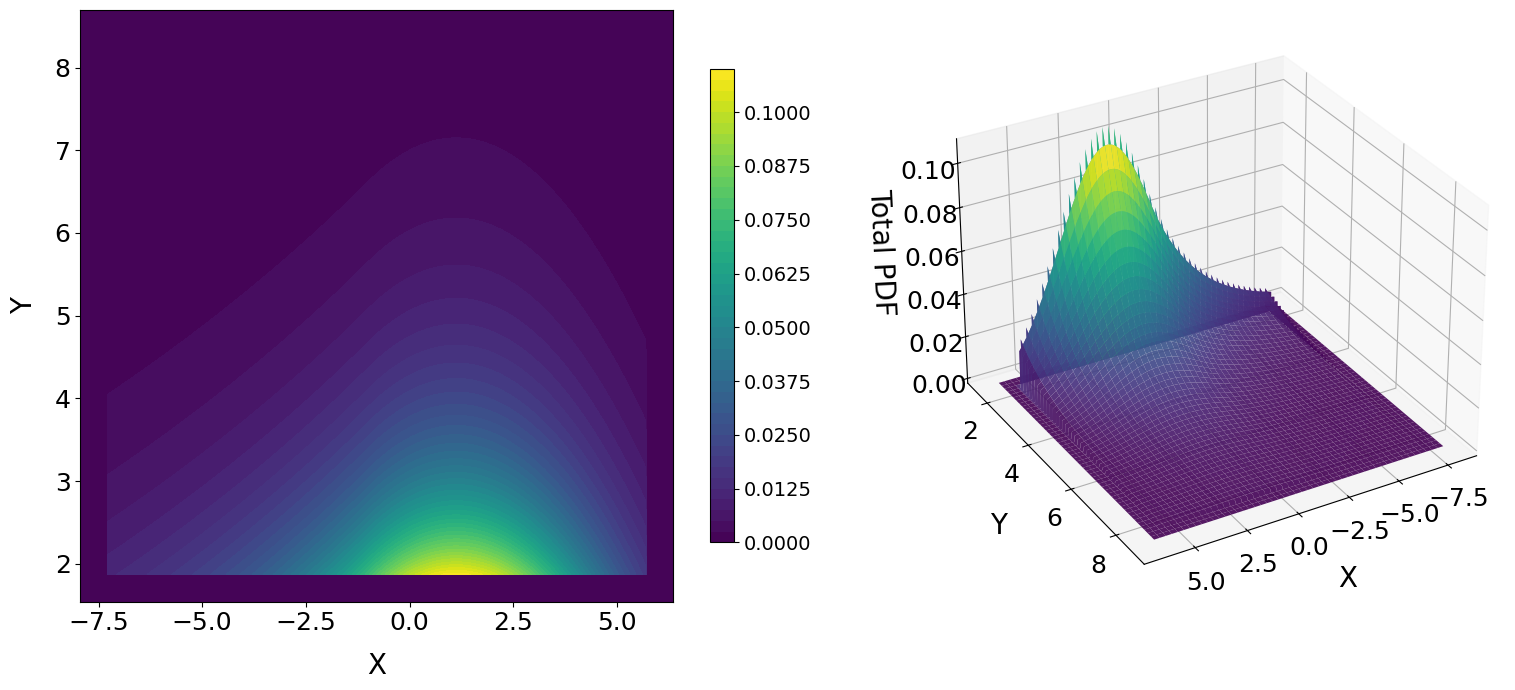

In [15]:
# Declare the Signal distribution with random parameters
signal = Signal(s_cb_mean, s_cb_sigma, s_cb_beta, s_cb_m, s_ed_lambda, s_x_lower_trunc, s_x_upper_trunc, s_y_lower_trunc, s_y_upper_trunc)

# Plot the distribution
signal.plot_dist()

#### Check Normalised to 1
- Integrate over 2 Dimensions
- over_whole_plane = False
    - The functions supports integrating over the whole real plane [-np.inf, np.inf] in both X and Y
    - However it typically takes upwards of 4 mins so it is disabilied for this demonstation

In [16]:
# Check Normalisation in 2D - just over truncated range 
signal.normalisation_check(over_whole_plane=False)

Normalisation over the region the PDF is defined/truncated: [-7.2872781599436935, 5.710850238007635] in X, [1.866703800257346, 8.370668075331727] in Y
Integral: 1.0000000001142917 ± 2.882919672363091e-09


### The Background Distribution, 2D ($B(X, Y)$)

[Relavent Code and Documentation for Background Distribution](https://stat-frequentist-analysis.readthedocs.io/en/latest/Stats_Analysis/Compound_Dist/Background_Class.html)

Given by:
$$
B(X, Y) = g_b(X) h_b(Y)
$$

Where:
- $g_b(X)$ is the Unifrom Distribution in the X Dimension
- $h_b(Y)$ is the Normal Distribution in the Y Dimension

#### Generate Random Parameters to trail on

In [17]:
# Pick random parameters for 2D Background distribution

# Random parameters for Normal distribution
b_nd_mean = np.random.uniform(-5,5)
b_nd_sigma = np.random.uniform(1,3)

# Truanction parameters
b_x_lower_trunc = np.random.uniform(-10,-5)
b_x_upper_trunc = np.random.uniform(5,10)
b_y_lower_trunc = np.random.uniform(-10,-5)
b_y_upper_trunc = np.random.uniform(5,10)

# Print the random parameters in a table
print("Random Background Distribution Parameters for testing")

b_parameters = {
    "Distribution": ["Uniform", "Normal", "Normal", "Truncation",  "Truncation",  "Truncation",  "Truncation"],
    "Parameter": ["N/A", "Mean", "Sigma", "X Lower", "X Upper", "Y Lower", "Y Upper"],
    "Value": ['N/A', b_nd_mean, b_nd_sigma, b_x_lower_trunc, b_x_upper_trunc, b_y_lower_trunc, b_y_upper_trunc]
}
b_df = pd.DataFrame(b_parameters)
print(b_df.to_markdown(index=False))

Random Background Distribution Parameters for testing
| Distribution   | Parameter   | Value               |
|:---------------|:------------|:--------------------|
| Uniform        | N/A         | N/A                 |
| Normal         | Mean        | -0.5816682557700392 |
| Normal         | Sigma       | 1.8680279866665874  |
| Truncation     | X Lower     | -6.911165107653414  |
| Truncation     | X Upper     | 7.565691212771954   |
| Truncation     | Y Lower     | -6.7480140903426635 |
| Truncation     | Y Upper     | 8.005194767022722   |


#### Initialise the 2D distribution using `Background` class
- using random parameters
- plot the distribution for visualisation

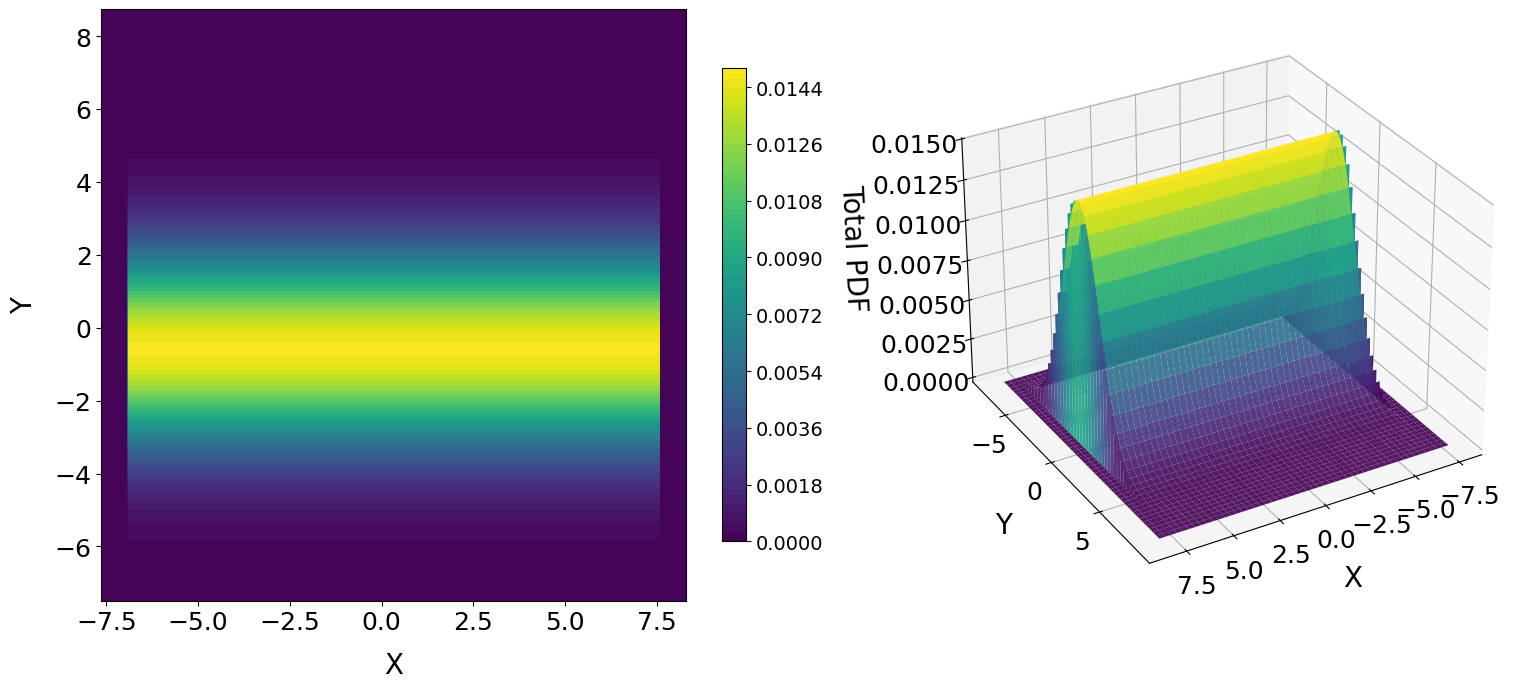

In [18]:
# Declare the Background distribution with random parameters
background = Background(b_nd_mean, b_nd_sigma, b_x_lower_trunc, b_x_upper_trunc, b_y_lower_trunc, b_y_upper_trunc)

# Plot the distribution
background.plot_dist()

#### Check Normalised to 1
- Integrate over 2 Dimensions
- over_whole_plane = False
    - The functions supports integrating over the whole real plane [-np.inf, np.inf] in both X and Y
    - However it typically takes upwards of 4 mins so it is disabilied for this demonstation

In [19]:
# Check Normalisation in 2D - just over truncated range 
background.normalisation_check(over_whole_plane=False)

Normalisation over the region the PDF is defined/truncated: [-6.911165107653414, 7.565691212771954] in X, [-6.7480140903426635, 8.005194767022722] in Y
Integral: 1.0000000000000004 ± 3.369600402197172e-13


### The Overall Distribution, 2D ($f(X, Y)$)

[Relavent Code and Documentation for Overall Distribution](https://stat-frequentist-analysis.readthedocs.io/en/latest/Stats_Analysis/Compound_Dist/Signal_Background_Class.html)

Given by:
$$
f(X, Y) = f S(X,Y) + (1-f) B(X,Y) \\
f(X, Y)   = f g_s(X) h_s(Y) + (1-f) g_b(X) h_b(Y)
$$

Where:
- S(X,Y) is the signal distribution in 2D
- B(X,Y) is the background distribution in 2D

#### Generate Random Parameters to trail on

In [20]:
# Pick random parameters for the overall distribution

# Random parameters for Crystal Ball distribution
o_cb_mean = np.random.uniform(-5,5)
o_cb_sigma = np.random.uniform(1,3)
o_cb_beta = np.random.uniform(0,3)
o_cb_m = np.random.uniform(1,5)

# Random parameters for Exponential Decay distribution
o_ed_lambda = np.random.uniform(0,1)

# Random parameters for Normal distribution
o_nd_mean = np.random.uniform(-5,5)
o_nd_sigma = np.random.uniform(1,3)

# Random parameters for fraction of signal
o_signal_fraction = np.random.uniform(0,1)

# Truanction parameters
o_x_lower_trunc = np.random.uniform(-10,-5)
o_x_upper_trunc = np.random.uniform(5,10)
o_y_lower_trunc = np.random.uniform(0,5)
o_y_upper_trunc = np.random.uniform(5,10)

# Print the random parameters in a table
print("Random Overall Distribution Parameters for testing")

o_parameters = {
    "Part": ["Signal", "Signal", "Signal", "Signal", "Signal", "Background", "Background", "Background", "Overall", "Truncation",  "Truncation",  "Truncation",  "Truncation"],
    "Distribution": ["Crystal Ball", "Crystal Ball", "Crystal Ball", "Crystal Ball", "Exponential Decay", "Uniform", "Normal", "Normal", '', "Truncation",  "Truncation",  "Truncation",  "Truncation"],
    "Parameter": ["Mean", "Sigma", "Beta", "M", "Lambda", "N/A", "Mean", "Sigma", "Fraction" ,"X Lower", "X Upper", "Y Lower", "Y Upper"],
    "Value": [o_cb_mean, o_cb_sigma, o_cb_beta, o_cb_m, o_ed_lambda,'N/A', o_nd_mean, o_nd_sigma, o_signal_fraction,  o_x_lower_trunc, o_x_upper_trunc, o_y_lower_trunc, o_y_upper_trunc]
}
o_df = pd.DataFrame(o_parameters)
print(o_df.to_markdown(index=False))

Random Overall Distribution Parameters for testing
| Part       | Distribution      | Parameter   | Value               |
|:-----------|:------------------|:------------|:--------------------|
| Signal     | Crystal Ball      | Mean        | 3.0522319683274644  |
| Signal     | Crystal Ball      | Sigma       | 2.0432943047872683  |
| Signal     | Crystal Ball      | Beta        | 2.725946642426005   |
| Signal     | Crystal Ball      | M           | 2.276944355954181   |
| Signal     | Exponential Decay | Lambda      | 0.09045934927090737 |
| Background | Uniform           | N/A         | N/A                 |
| Background | Normal            | Mean        | -1.9929994336379664 |
| Background | Normal            | Sigma       | 1.2279687237270995  |
| Overall    |                   | Fraction    | 0.8286813263076767  |
| Truncation | Truncation        | X Lower     | -9.76551840305375   |
| Truncation | Truncation        | X Upper     | 8.131435741556963   |
| Truncation | Truncation 

#### Initialise the 2D distribution using `Signal_Background` class
- using random parameters
- plot the distribution for visualisation

Maximum PDF value found: 0.0654450889050039


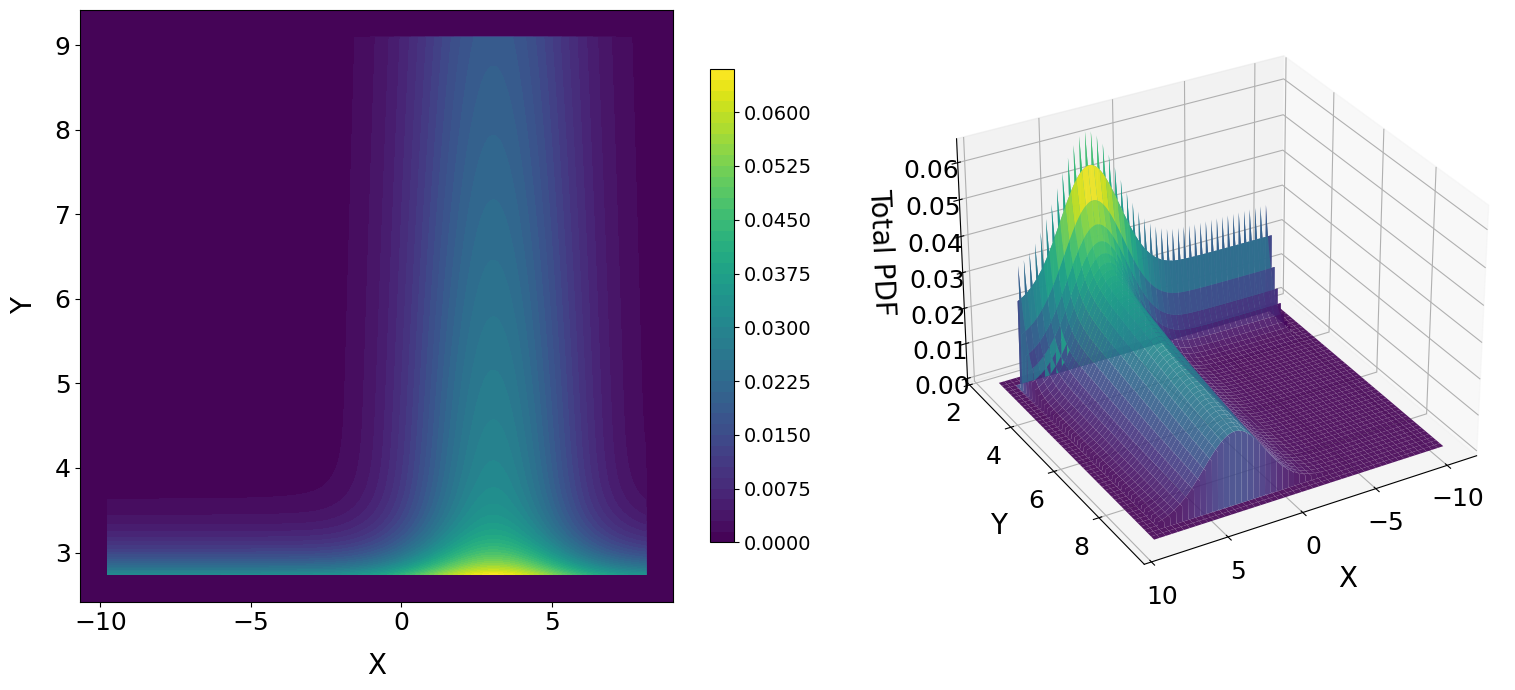

In [21]:
# Declare the overall distribution with random parameters
overall_random = Signal_Background(o_cb_mean, o_cb_sigma, o_cb_beta, o_cb_m, o_ed_lambda, o_nd_mean, o_nd_sigma, o_signal_fraction, o_x_lower_trunc, o_x_upper_trunc, o_y_lower_trunc, o_y_upper_trunc)

# Plot the distribution
overall_random.plot_dist()

#### Check Normalised to 1
- Integrate over 2 Dimensions
- over_whole_plane = False
    - The functions supports integrating over the whole real plane [-np.inf, np.inf] in both X and Y
    - However it typically takes upwards of 4 mins so it is disabilied for this demonstation

In [22]:
# Check Normalisation in 2D - just over truncated range 
overall_random.normalisation_check(over_whole_plane=False)

Normalisation over the region the PDF is defined/truncated: [-9.76551840305375, 8.131435741556963] in X, [2.737930779596218, 9.096434978350343] in Y
Integral: 1.0000000001523168 ± 7.457205241667831e-09


## Performing for parameters given in Equation 5
- This section preforms the same analysis as above
- However it initialses the distribution all at once using the `Signal_Background` class and exploid the moduluar nature to prodce the plots and preform the analysis all through this

### Defining the parameters from Equation 5


In [23]:
# Parameters for Crystal Ball distribution
mean = 3
sigma = 0.3
beta = 1
m = 1.4

# Parameters for Exponential Decay distribution
lamb = 0.3

# Parameters for Normal distribution
mean_b = 0
sigma_b = 2.5

# Parameters for fraction of signal
f = 0.6

# Parameters
x_lower_trunc = 0
x_upper_trunc = 5
y_lower_trunc = 0
y_upper_trunc = 10

# Parameters in a table
print("Overall Distribution Parameters")

parameters = {
    "Part": ["Signal", "Signal", "Signal", "Signal", "Signal", "Background", "Background", "Background", "Overall", "Truncation",  "Truncation",  "Truncation",  "Truncation"],
    "Distribution": ["Crystal Ball", "Crystal Ball", "Crystal Ball", "Crystal Ball", "Exponential Decay", "Uniform", "Normal", "Normal", '', "Truncation",  "Truncation",  "Truncation",  "Truncation"],
    "Parameter": ["Mean", "Sigma", "Beta", "M", "Lambda", "N/A", "Mean", "Sigma", "Fraction" ,"X Lower", "X Upper", "Y Lower", "Y Upper"],
    "Value": [mean, sigma, beta, m, lamb,'N/A', mean_b, sigma_b, f,  x_lower_trunc, x_upper_trunc, y_lower_trunc, y_upper_trunc]
}
df = pd.DataFrame(parameters)
print(df.to_markdown(index=False))

Overall Distribution Parameters
| Part       | Distribution      | Parameter   | Value   |
|:-----------|:------------------|:------------|:--------|
| Signal     | Crystal Ball      | Mean        | 3       |
| Signal     | Crystal Ball      | Sigma       | 0.3     |
| Signal     | Crystal Ball      | Beta        | 1       |
| Signal     | Crystal Ball      | M           | 1.4     |
| Signal     | Exponential Decay | Lambda      | 0.3     |
| Background | Uniform           | N/A         | N/A     |
| Background | Normal            | Mean        | 0       |
| Background | Normal            | Sigma       | 2.5     |
| Overall    |                   | Fraction    | 0.6     |
| Truncation | Truncation        | X Lower     | 0       |
| Truncation | Truncation        | X Upper     | 5       |
| Truncation | Truncation        | Y Lower     | 0       |
| Truncation | Truncation        | Y Upper     | 10      |


#### Initialise the 2D distribution using `Signal_Background` class
- using parameters from Equation 5

In [24]:
# Declare the overall distribution with parameters
overall = Signal_Background(mean, sigma, beta, m, lamb, mean_b, sigma_b, f, x_lower_trunc, x_upper_trunc, y_lower_trunc, y_upper_trunc)

Maximum PDF value found: 0.21804724534774383


#### Plotting and checking normalisation of the Crystal Ball Distribution component (Overall > Signal > X)

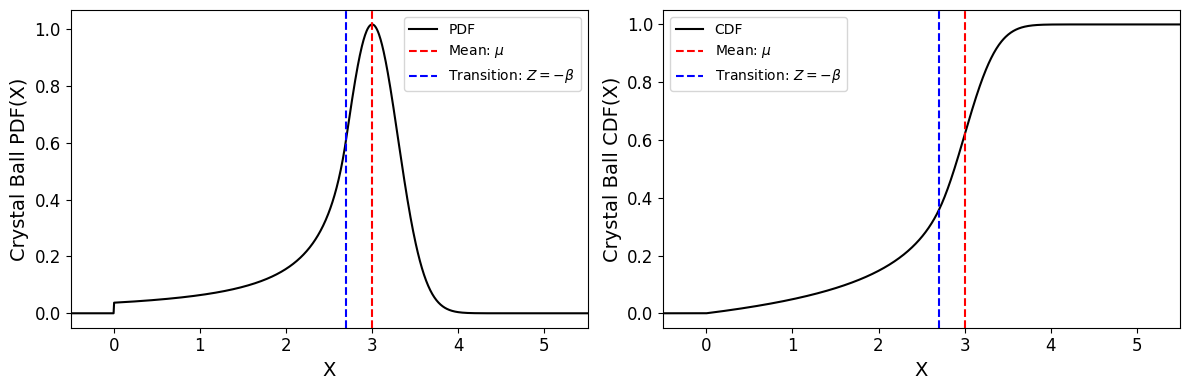

Normalisation over the region the PDF is defined/truncated: [0,5]
Integral: 1.0000000376260723 ± 7.2897966170979746e-09
Normalisation over the whole real line: [infinity to infinity]
Integral: 1.0000000000361406 ± 4.337850306255533e-09


In [25]:
# Call the component distribution from within the Signal_Background class
overall.Signal.X.plot_dist()
overall.Signal.X.normalisation_check()

#### Plotting and checking normalisation of the Exponential Decay Distribution component (Overall > Signal > Y)

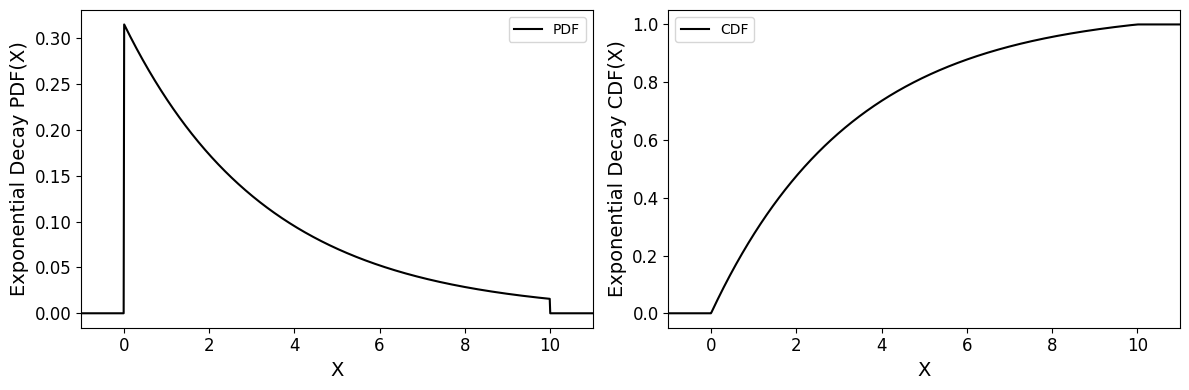

Normalisation over the region the PDF is defined/truncated: [0,10]
Integral: 0.9999999999999999 ± 1.1102230246251564e-14
Normalisation over the whole real line: [infinity to infinity]
Integral: 0.9999999999999999 ± 1.1102230246251564e-14


In [26]:
# Call the component distribution from within the Signal_Background class
overall.Signal.Y.plot_dist()
overall.Signal.Y.normalisation_check()

#### Plotting and checking normalisation of the Uniform Distribution component (Overall > Background > X)

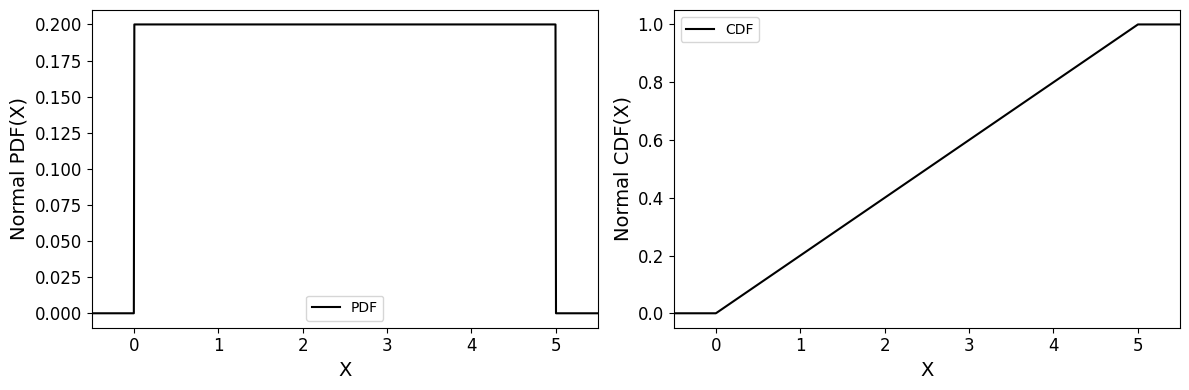

Normalisation over the region the PDF is defined/truncated: [0,5]
Integral: 1.0 ± 1.1102230246251565e-14
Normalisation over the whole real line: [infinity to infinity]
Integral: 0.9999999999999882 ± 3.935307413271971e-09


In [27]:
# Call the component distribution from within the Signal_Background class
overall.Background.X.plot_dist()
overall.Background.X.normalisation_check()

#### Plotting and checking normalisation of the Normal Distribution component (Overall > Background > Y)

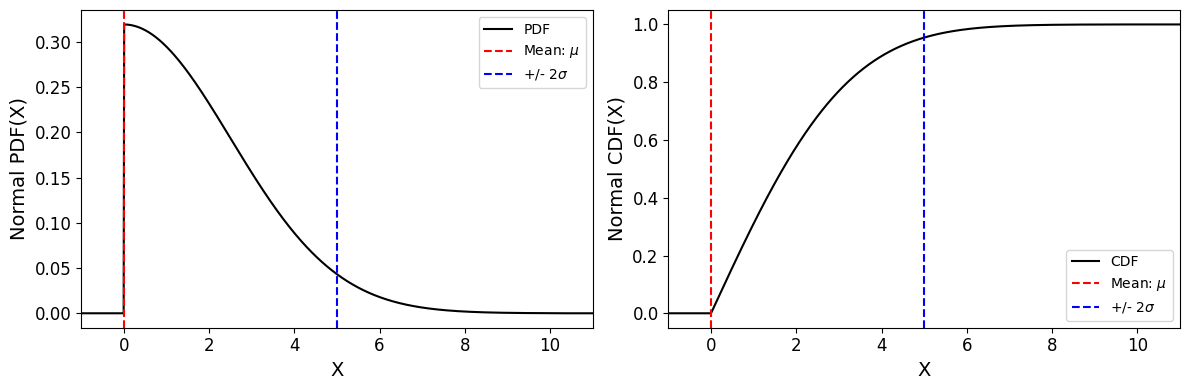

Normalisation over the region the PDF is defined/truncated: [0,10]
Integral: 1.0000000000000004 ± 4.839198166838126e-12
Normalisation over the whole real line: [infinity to infinity]
Integral: 0.9999999998291037 ± 1.2382678581400304e-08


In [28]:
# Call the component distribution from within the Signal_Background class
overall.Background.Y.plot_dist()
overall.Background.Y.normalisation_check()

#### Plotting and checking normalisation of overall Signal component (Overall > Signal)

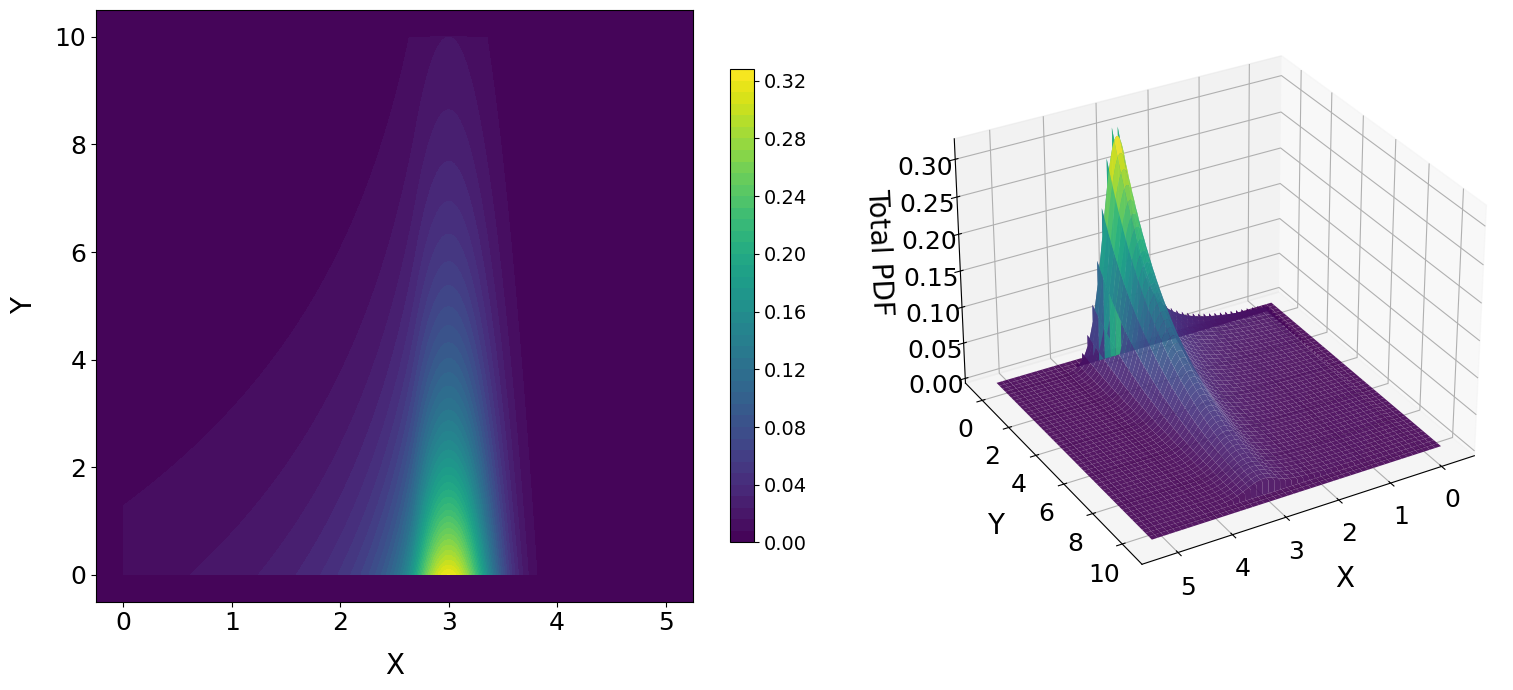

Normalisation over the region the PDF is defined/truncated: [0, 5] in X, [0, 10] in Y
Integral: 1.0000000376260723 ± 7.2897964287314e-09
Normalisation over the whole real plane: X in [-infinity, infinity], Y in [-infinity, infinity]
Integral: 0.9999999996611829 ± 1.4888720478722917e-08


In [29]:
# Call the component distribution from within the Signal_Background class
overall.Signal.plot_dist()
overall.Signal.normalisation_check(over_whole_plane=True)

#### Plotting and checking normalisation of overall Background component (Overall > Background)

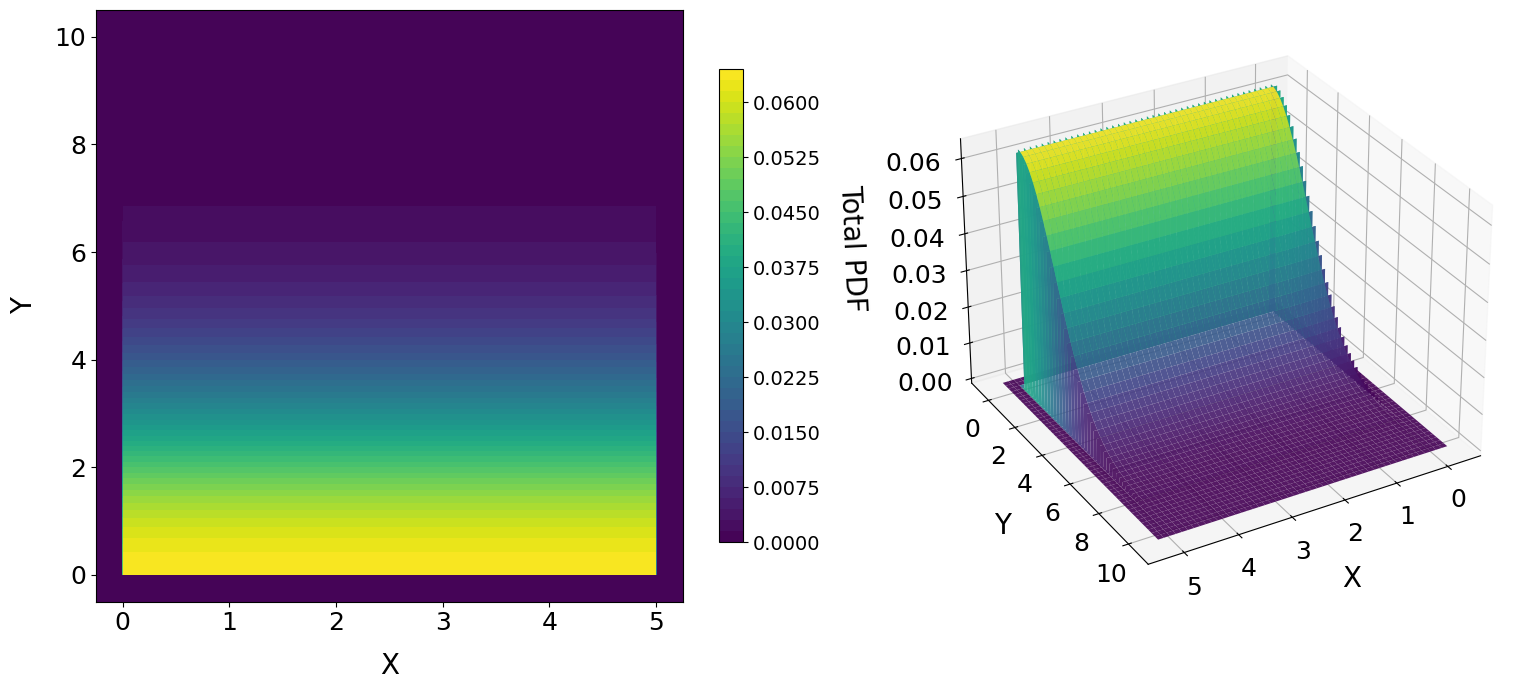

Normalisation over the region the PDF is defined/truncated: [0, 5] in X, [0, 10] in Y
Integral: 1.0000000000000002 ± 9.678414025637658e-13
Normalisation over the whole real plane: X in [-infinity, infinity], Y in [-infinity, infinity]
Integral: 1.0000000064099226 ± 8.327130568419605e-09


In [30]:
# Call the component distribution from within the Signal_Background class
overall.Background.plot_dist()
overall.Background.normalisation_check(over_whole_plane=True)

#### Plotting and checking normalisation of overall distribution (Overall)

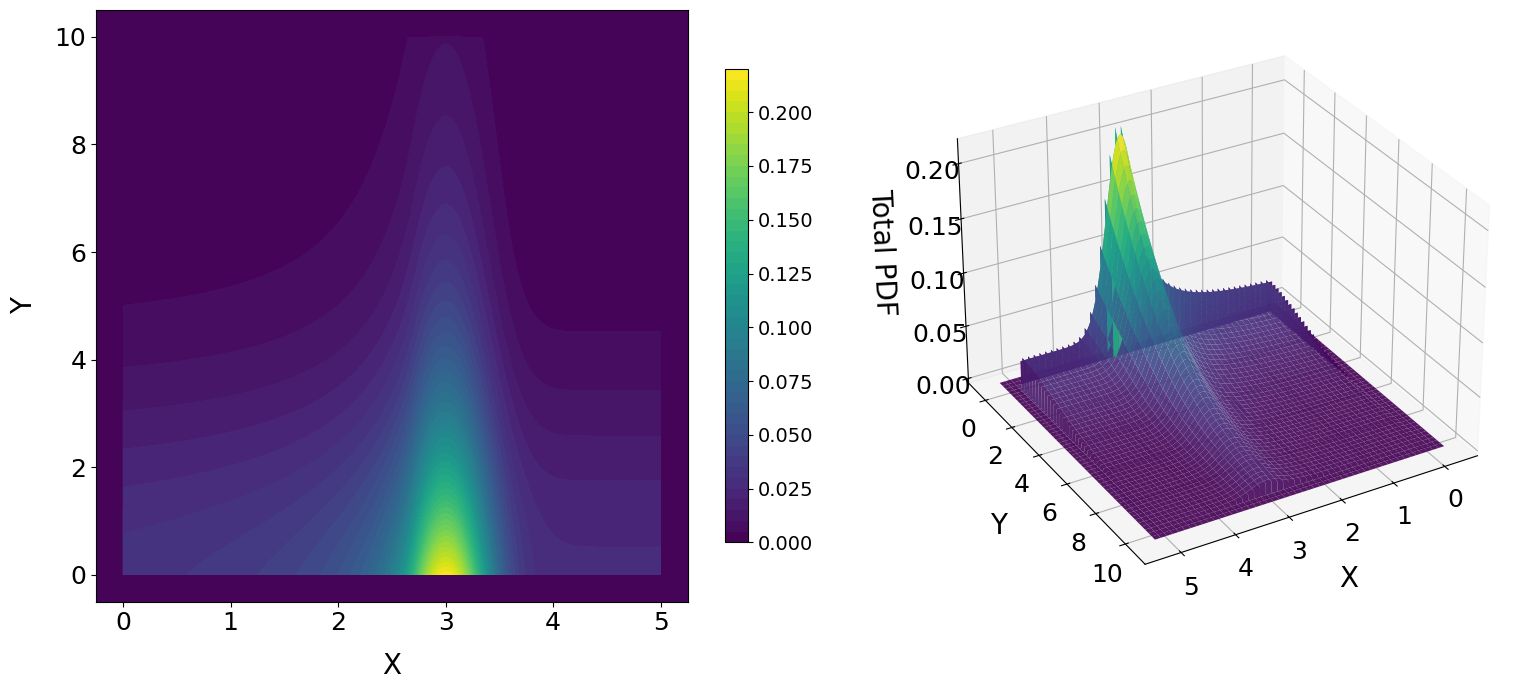

Normalisation over the region the PDF is defined/truncated: [0, 5] in X, [0, 10] in Y
Integral: 1.0000000225756436 ± 4.373878973809868e-09
Normalisation over the whole real plane: X in [-infinity, infinity], Y in [-infinity, infinity]
Integral: 1.0000000005002643 ± 1.4816127213990171e-08


In [31]:
overall.plot_dist()
overall.normalisation_check(over_whole_plane=True)